<a href="https://colab.research.google.com/github/javiervz/network_science/blob/master/graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A crash course on Graph Theory :)**



A graph $G=(V,E)$ is a pair completely defined by:

1. the set of **nodes** $V\neq \emptyset$
2. the set of **edges** $E$ 

We denote $|V|=n$ and $|E|=m$. 




**Question 1:** Determine the number of edges if there is an edge for every pair of nodes of the graph $G$ 

The **density** of a graph $G$ is $$\frac{2m}{n(n-1)}$$

In [0]:
## important libraries!!!
import networkx as nx
import matplotlib.pyplot as plt
import random

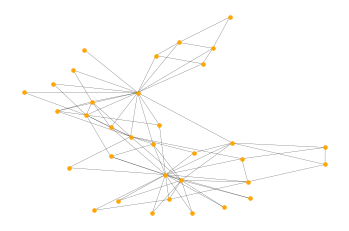

In [2]:
## an example
G = nx.karate_club_graph()

## visualization
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 12, node_color='orange') 
nx.draw_networkx_edges(G, pos, alpha=0.75,width=0.25,edge_color='k')
plt.axis('off')
plt.show()

In [0]:
density=nx.density(G)

In [4]:
density

0.13903743315508021

A graph of density 1 is said to be **complete**, denoted as $K_n$ ($n$ is the size of the set of nodes)

In [0]:
def plot_graph(G):
  pos = nx.spring_layout(G)
  labels={i:i for i in G.nodes}
  nx.draw_networkx_nodes(G, pos, node_size = 200, node_color='orange') 
  nx.draw_networkx_edges(G, pos, alpha=1.,width=0.75,edge_color='m')
  nx.draw_networkx_labels(G,pos,labels,alpha=0.95,font_size=15,font_color='k')
  plt.axis('off')
  plt.show()

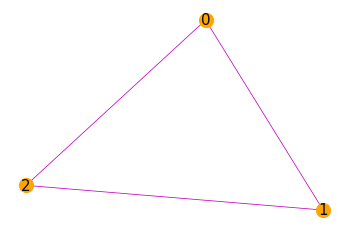

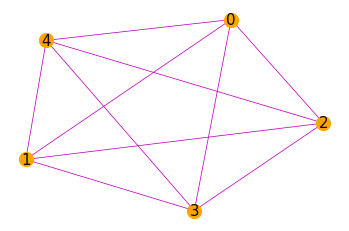

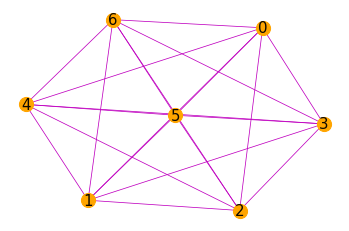

In [6]:
## complete graphs!!!
for k in [3,5,7]:
  Kn=nx.complete_graph(k)
  plot_graph(Kn)



**Question 2:** How to scales the number of edges  as a function of $n$?

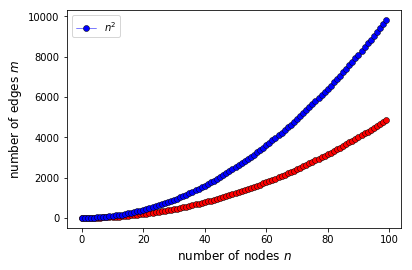

In [7]:
X=range(100)
Y=[nx.complete_graph(x) for x in X]


plt.plot(X,[nx.number_of_edges(G) for G in Y],marker='o',color='r',markersize=6,markeredgecolor='k',markeredgewidth=0.5,fillstyle='full',clip_on=True,linewidth=0.5)
plt.plot(X,[x**2 for x in X],marker='o',color='b',markersize=6,markeredgecolor='k',markeredgewidth=0.5,fillstyle='full',clip_on=True,linewidth=0.5,label=r'$n^2$')

plt.grid(False)
plt.legend(loc='best')

plt.ylabel(r'number of edges $m$',fontsize=12)
plt.xlabel(r'number of nodes $n$',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.show()

**Question 3:** How many complete graphs of $n$ nodes we can define?

Two graphs $G=(V,E)$ and $G'=(V',E')$, with $|V|=|V'|$, are said to be  **isomorphic** if there is a bijection $\phi: V \rightarrow V'$ such that if $(u,v) \in V$ iff $(\phi(u),\phi(v))
\in V'$. 

---



Two small graphs $G_1$ and $G_2$

In [0]:
G1=nx.Graph()
G2=nx.Graph()

In [0]:
G1.add_edge(1,2)
G1.add_edge(2,3)
G1.add_edge(3,4)
G1.add_edge(4,1)

In [0]:
G2.add_edge(1,2)
G2.add_edge(2,4)
G2.add_edge(4,3)
G2.add_edge(3,1)

In [11]:
G1.edges(data=True)

EdgeDataView([(1, 2, {}), (1, 4, {}), (2, 3, {}), (3, 4, {})])

In [12]:
G2.edges(data=True)

EdgeDataView([(1, 2, {}), (1, 3, {}), (2, 4, {}), (4, 3, {})])

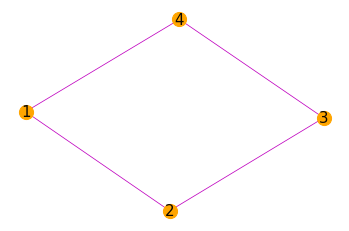

In [13]:
plot_graph(G1)

    

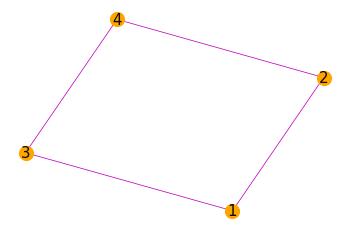

In [14]:
plot_graph(G2)

**Question 4:** Determine if $G_1$ and $G_2$ are isomorphic.  

Consider:

1. $G=(V,E)$.
2. a subset $V'\subseteq V$

Then, the **subgraph induced** by $V'$ is the pair $G'=(V',E')$, where $E'$ contains all links of $G$ that join nodes in $V'$. 

**Question 5:** Consider the complete graph $K_4$. Determine the subgraph induced by any three-node combination. 

In [0]:
K4=nx.complete_graph(4)

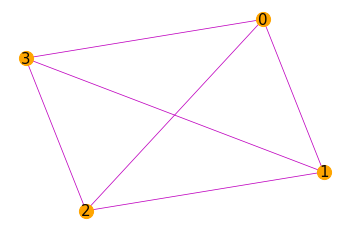

In [16]:
plot_graph(K4)

In [0]:
## remove node 1
K4.remove_node(1)

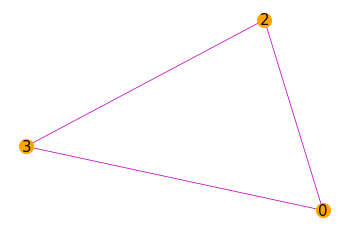

In [18]:
plot_graph(K4)

In [0]:
## again K4
K4=nx.complete_graph(4)

In [0]:
## subgraph induced by [1,2,3]
S=K4.subgraph([1,2,3])

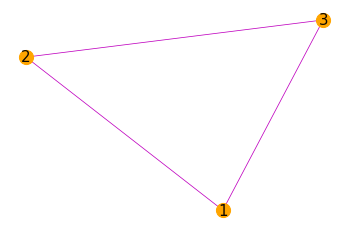

In [21]:
plot_graph(S)

**Question 6:** Remove iteratively nodes in order to increase density of graph G = nx.karate_club_graph()


density=0.13903743315508021


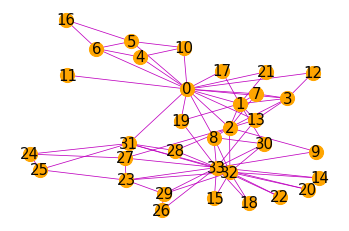

removed node: 28 density=0.14204545454545456


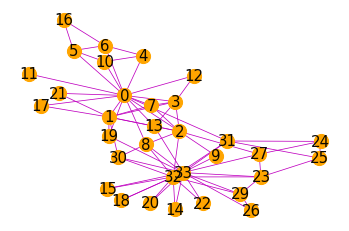

removed node: 10 density=0.14408602150537633


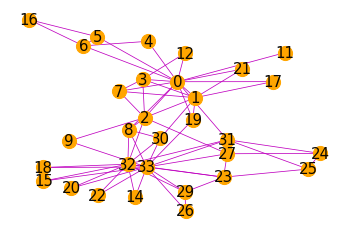

removed node: 11 density=0.15


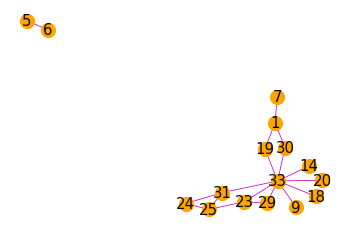

removed node: 14 density=0.1619047619047619


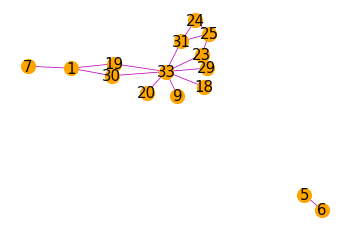

removed node: 29 density=0.16483516483516483


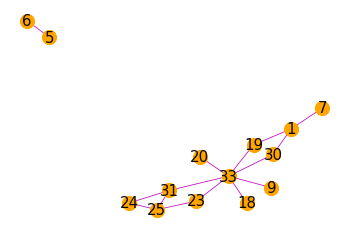

In [22]:
G = nx.karate_club_graph()
density=nx.density(G)
print('density='+str(density))
plot_graph(G)

while len(G)>0:
  node=random.choice(list(G.nodes))
  G.remove_node(node)
  density_remove=nx.density(G)
  if density_remove>density:
    print('removed node: '+str(node)+' '+'density='+str(density_remove))
    density=density_remove
    plot_graph(G)
  

Consider a graph $G=(V,E)$. The **neighborhood** of a node $u \in U$ is defined as $$V_u=\{v\in U: (u,v)\in E\}$$ 

**Question 7:**

1. Represent a **chessboard** as a graph $C$
2. Define different types of neighborhoods in $C$
3. How to define a neighborhood of radius $r$?

In [0]:
## grid graph!
grid=nx.grid_graph([2,3], periodic=True)

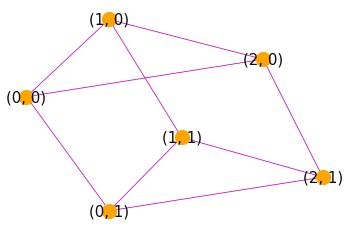

In [24]:
plot_graph(grid)

**Question 8:** What is the meaning of periodic=True?

A **directed** graph $G=(V,E)$ is a pair formed by a set of nodes $V$ and an ordered set of edges $E$. For this type of graphs, $(u,v) \neq (v,u)$.

In [0]:
## a directed graph or digraph!
G = nx.DiGraph()

In [0]:
G.add_edges_from([(1,2),(1,3),(1,4),(2,3)])

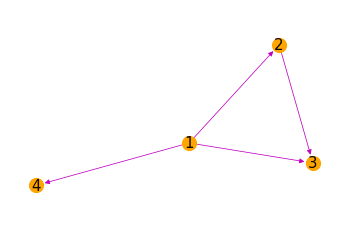

In [27]:
plot_graph(G)

**Degree** notions!

1. For an **undirected** graph $G=(V,E)$, the **degree** $d(u)$ of a node $u \in V$ is defined as $d(u)=|V_u|$ (number of neighbors!!!).
2. For a **directed** graph $DG=(V,E)$, 
  - the **out-degree** of $u$ is the number of outgoing edges, that is, $d_{out}(u)=|\{v \in V_u: (u,v) \in V\}|$
  - the **in-degree** of $u$ is the number of ingoing edges, that is, $d_{in}(u)=|\{v \in V_u: (v,u) \in V\}|$

In [28]:
G.in_degree()

InDegreeView({1: 0, 2: 1, 3: 2, 4: 1})

In [29]:
G.out_degree()

OutDegreeView({1: 3, 2: 1, 3: 0, 4: 0})

**Question 9:** ¿$d(u)=d_{out}(u)+d_{in}(u)$?

**Paths!** Consider a graph $G=(V,E)$. 
1. A **walk** is an alternating sequence of nodes and edges of the form $u_0,e_1,u_1,...,u_k$ such that for $1 \leqslant i \leqslant k$, the edge $i$ has endpoints $u_{i-1}$ and $u_i$. A **path** is a **walk** without repeated nodes. The **length** of a **walk** is its number of edges. A **$u,v$-walk** is a walk with endpoints $u$ and $v$. A **walk** is said to be **closed** if its endpoints are the same. A **cycle** is a closed walk.

2. A **shortest path** from node $u$ to node $v$, with $u,v \in V$, is a **$u,v$-walk** of minimal length. 



In [0]:
## an example!!!
D={'vehículo':'medio de transporte de personas o cosas.','automóvil':'vehículo que puede ser guiado para marchar por una vía ordinaria sin necesidad de carriles y lleva un motor','coche':'automóvil destinado al transporte de personas y con capacidad no superior a siete plazas'}

In [31]:
D

{'automóvil': 'vehículo que puede ser guiado para marchar por una vía ordinaria sin necesidad de carriles y lleva un motor',
 'coche': 'automóvil destinado al transporte de personas y con capacidad no superior a siete plazas',
 'vehículo': 'medio de transporte de personas o cosas.'}

In [0]:
table = str.maketrans({key: None for key in '!"#$%&\¿()*+,-./:;<=>?@[\\]_{|}'})
D={key:D[key].translate(table).split(' ') for key in D.keys()}
  
  

In [33]:
D

{'automóvil': ['vehículo',
  'que',
  'puede',
  'ser',
  'guiado',
  'para',
  'marchar',
  'por',
  'una',
  'vía',
  'ordinaria',
  'sin',
  'necesidad',
  'de',
  'carriles',
  'y',
  'lleva',
  'un',
  'motor'],
 'coche': ['automóvil',
  'destinado',
  'al',
  'transporte',
  'de',
  'personas',
  'y',
  'con',
  'capacidad',
  'no',
  'superior',
  'a',
  'siete',
  'plazas'],
 'vehículo': ['medio', 'de', 'transporte', 'de', 'personas', 'o', 'cosas']}

In [0]:
def create_graph(dictionary):
  G=nx.Graph()
  for key in dictionary.keys():
    pairs=[(key,word) for word in dictionary[key]]
    for pair in pairs:
      if G.has_edge(pair[0],pair[1])==False:
        G.add_edge(pair[0],pair[1])
        
  return G

In [0]:
graph_D=create_graph(D)

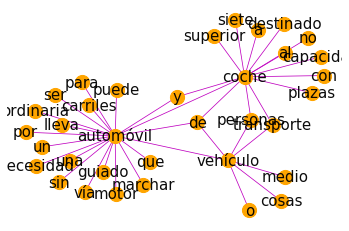

In [36]:
plot_graph(graph_D)

In [0]:
paths = list(nx.shortest_simple_paths(graph_D, 'vehículo', 'coche'))


In [38]:
paths

[['vehículo', 'automóvil', 'coche'],
 ['vehículo', 'transporte', 'coche'],
 ['vehículo', 'de', 'coche'],
 ['vehículo', 'personas', 'coche'],
 ['vehículo', 'automóvil', 'de', 'coche'],
 ['vehículo', 'de', 'automóvil', 'coche'],
 ['vehículo', 'automóvil', 'y', 'coche'],
 ['vehículo', 'de', 'automóvil', 'y', 'coche']]

**Connectedness!** 

1. Two nodes $u$ and $v$ of a graph $G=(V,E)$ are said to be **connected** if there is a path between them.

2. $G$ is said to be **connected** if any pair of nodes is connected.

3. A **connected component** of an undirected graph $G=(V,E)$ is a maximal induced subgraph $G'=(V',E')$, in which any pair of nodes $u,v \in V'$ is connected.

1


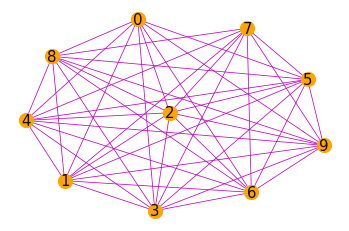

1


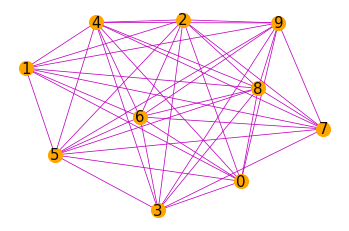

1


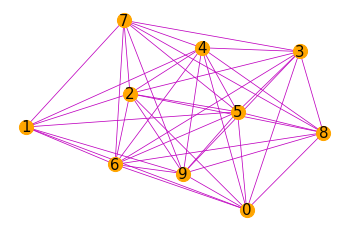

1


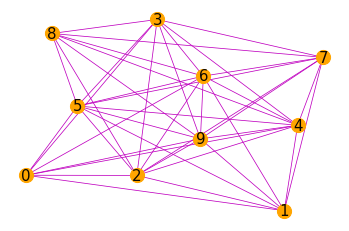

1


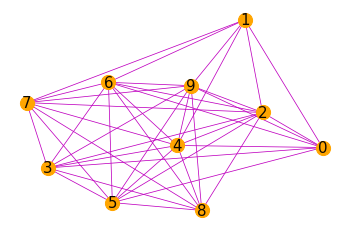

1


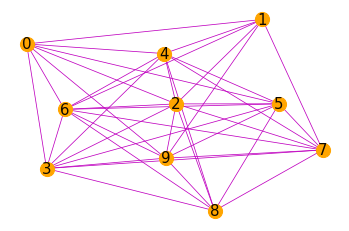

1


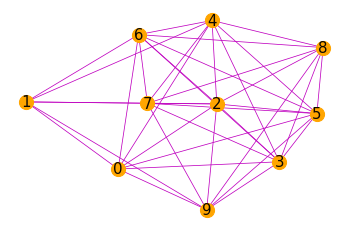

1


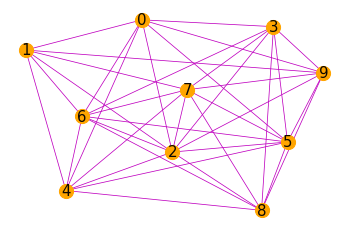

1


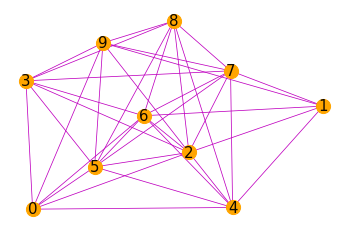

1


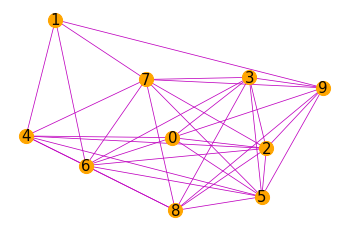

1


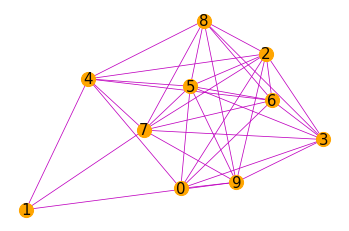

1


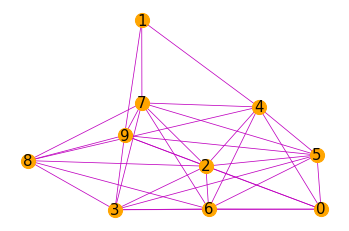

1


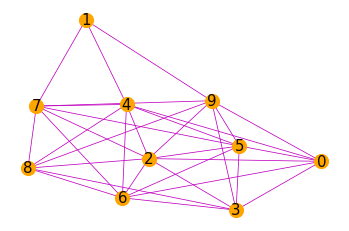

1


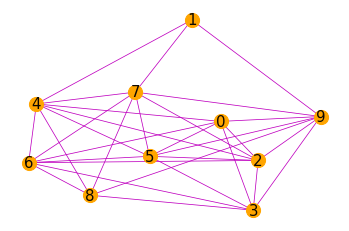

1


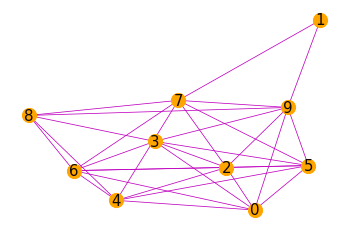

1


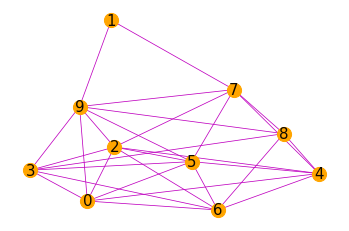

1


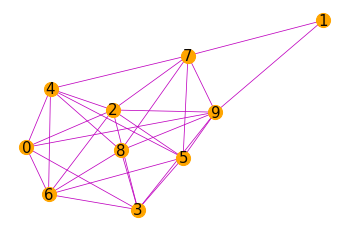

1


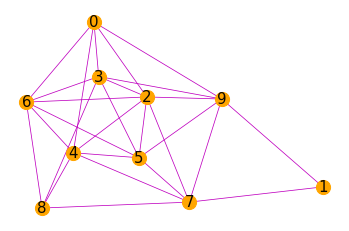

1


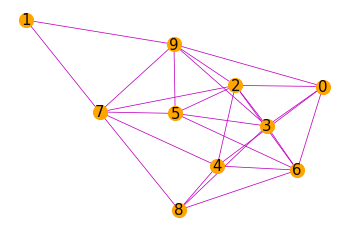

1


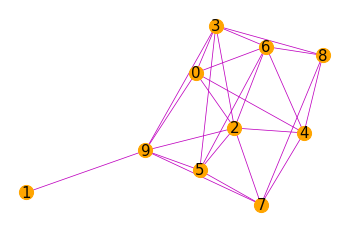

1


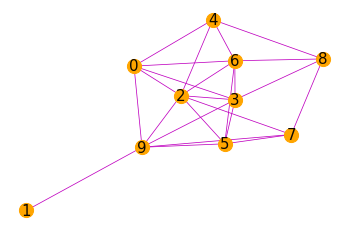

1


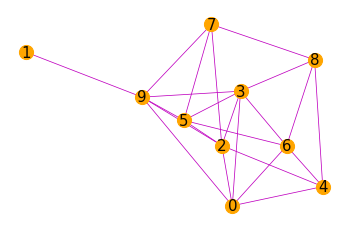

1


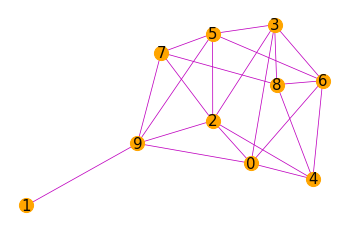

1


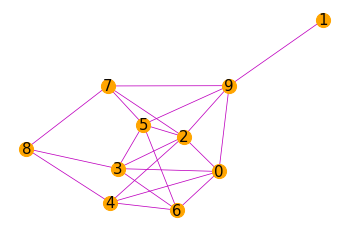

1


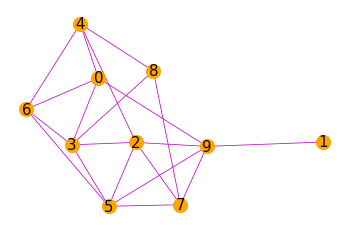

1


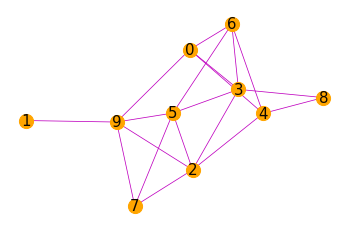

1


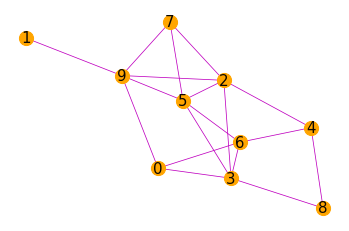

1


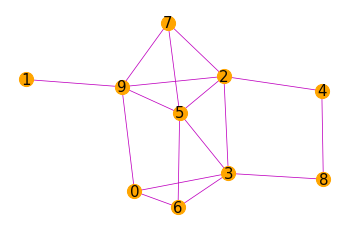

1


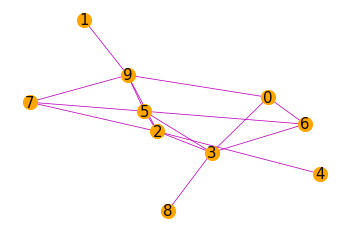

1


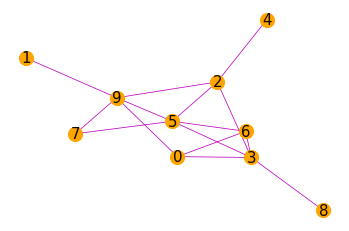

1


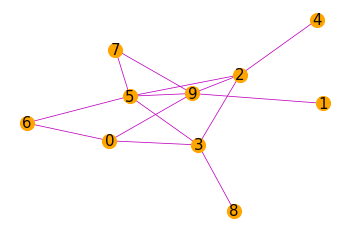

2


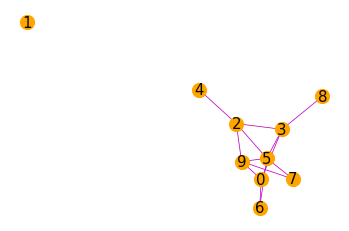

3


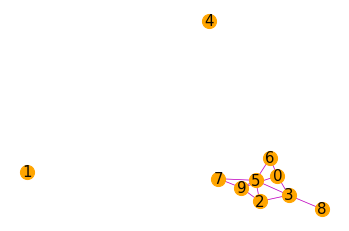

3


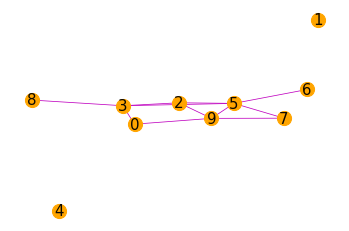

3


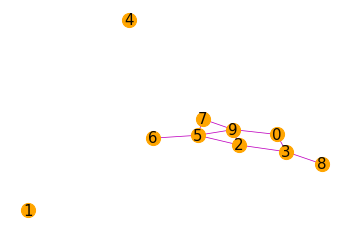

3


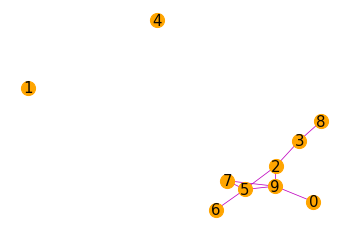

4


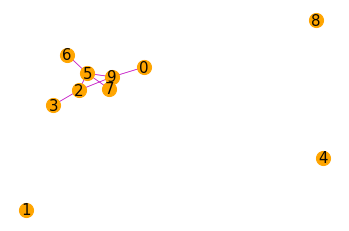

5


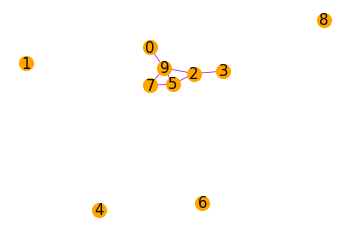

6


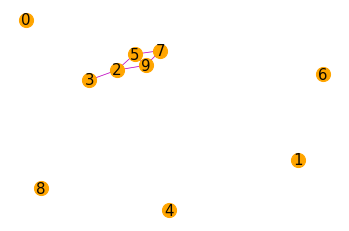

7


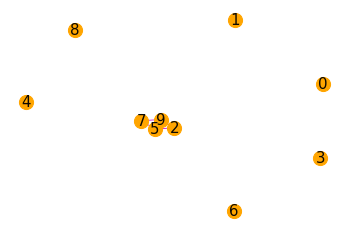

7


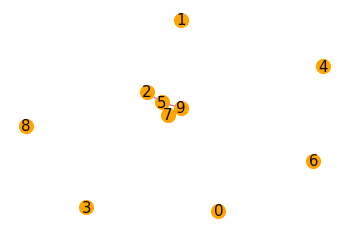

7


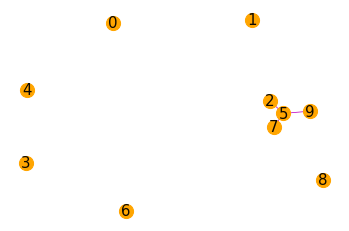

8


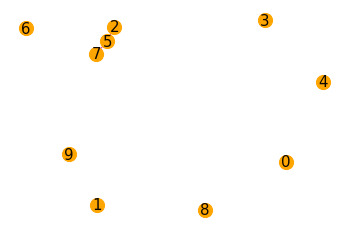

9


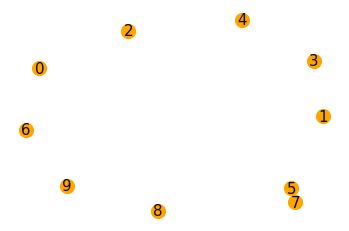

10


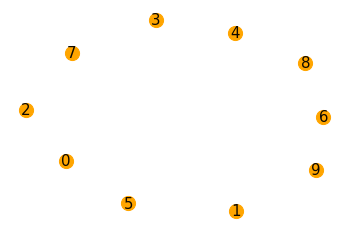

In [40]:
## connected components!
k=10
percentage=0.1
Kn=nx.complete_graph(k)
while len(Kn)>0:
  try:
    edges=random.sample(Kn.edges(),int(len(Kn)*percentage))
    Kn.remove_edges_from(edges)
    print(nx.number_connected_components(Kn))
    #plot_graph(max(nx.connected_component_subgraphs(Kn), key=len))
    plot_graph(Kn)
  except ValueError:
    break
  

**Trees! :)** Three equivalent definitions:

1. A connected acyclic graph.

2. A connected graph with $n-1$ links, where $n$ is the number of nodes.

3. An acyclic graph with $n-1$ links, where $n$ is the number of nodes.

**Question 10:** What is the intuition behind Proposition 1.1?

**The main idea is:** in a tree there cannot exist two different paths that join two nodes, otherwise a cycle would form. 


**Question 11:** Prove Proposition 1.2

Let $G = (V,E)$ be a graph. Suppose that for each pair of distinct nodes
of the graph there exists one and only one path joining the nodes. Then $G$ is connected and if we remove any edge $e\in E$, the resulting graph $G-e$ will not be connected

**Question 11:** What is the intuition behind Proposition 1.3?


**Question 12:** Prove that:

a connected acyclic graph $\Rightarrow$ a connected graph with $n-1$ links, where $n$ is the number of nodes

A **forest** is an undirected graph, all of whose connected components are **trees**. 

In [0]:
## tree!!
n=10
T=nx.random_tree(n)

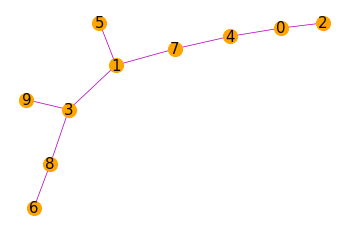

In [44]:
plot_graph(T)

In [0]:
S=nx.star_graph(n)

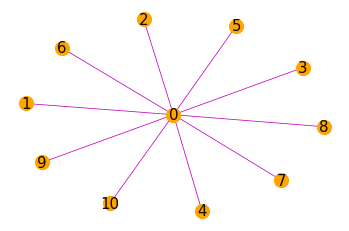

In [46]:
plot_graph(S)

In [0]:
P=nx.path_graph(n)

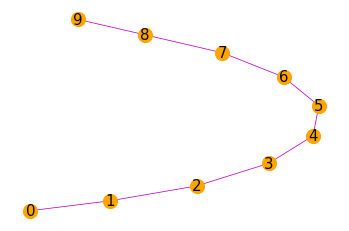

In [58]:
plot_graph(P)

A **bipartite** graph is a triple $G=(T,B,E)$ where $T$ and $B$ are two disjoint sets of edges of nodes (respectively, top and bottom nodes), and $E \subseteq T \times B$ is the set of edges. 

**Examples:** actors, coauthoring, cooccurrence!



[link text](https://graal.ens-lyon.fr/~abenoit/reso06/papier/biparti.pdf)

In [81]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk import sent_tokenize
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

In [0]:
text="Allyson Michelle Felix OLY (born November 18, 1985) is an American track and field sprinter who competes in the 100 meters, 200 meters, and 400 meters. At 200 meters, she is the 2012 Olympic champion, a 3-time World champion (2005–09), and 2-time Olympic silver medalist (2004–08). At 400 meters, she is the 2015 World champion, 2011 World silver medalist, 2016 Olympic silver medalist, and 2017 World bronze medalist. Felix has won five additional Olympic gold medals as a member of the United States' women's relay teams: three at 4 × 400 meters (2008–16), and two at 4 x 100 meters (2012–16). The 2012 U.S. Olympic 4 x 100 meters team also set the women's 4x100 meters world-record that still stands. Felix is the only female track and field athlete to ever win six Olympic gold medals, and is tied with Merlene Ottey as the most decorated female Olympian in track and field history, with a total of nine Olympic medals. Felix is also the most decorated athlete in IAAF World Championships history with 16 career medals.Felix's 200 meters best of 21.69 secs from 2012, ranks her sixth on the all-time list. In 2013, she broke the world best for the rarely contested 150 meters distance, running 16.36 secs. In the 4 × 400 metres relay at the 2015 World Championships, she ran the fastest split ever recorded by an American woman, and third fastest split ever after Jarmila Kratochvilova and Marita Koch, with 47.72. As a participant in the US Anti-Doping Agency's 'Project Believe' program, Felix is regularly tested for performance-enhancing drugs. She is coached by Bobby Kersee."

In [0]:
sentences=[[word for word in s.lower().translate(table).split(' ') if word not in stop_words] for s in sent_tokenize(text)]

In [85]:
sentences

[['allyson',
  'michelle',
  'felix',
  'oly',
  'born',
  'november',
  '18',
  '1985',
  'american',
  'track',
  'field',
  'sprinter',
  'competes',
  '100',
  'meters',
  '200',
  'meters',
  '400',
  'meters'],
 ['200',
  'meters',
  '2012',
  'olympic',
  'champion',
  '3time',
  'world',
  'champion',
  '2005–09',
  '2time',
  'olympic',
  'silver',
  'medalist',
  '2004–08'],
 ['400',
  'meters',
  '2015',
  'world',
  'champion',
  '2011',
  'world',
  'silver',
  'medalist',
  '2016',
  'olympic',
  'silver',
  'medalist',
  '2017',
  'world',
  'bronze',
  'medalist'],
 ['felix',
  'five',
  'additional',
  'olympic',
  'gold',
  'medals',
  'member',
  'united',
  "states'",
  "women's",
  'relay',
  'teams',
  'three',
  '4',
  '×',
  '400',
  'meters',
  '2008–16',
  'two',
  '4',
  'x',
  '100',
  'meters',
  '2012–16'],
 ['2012',
  'us',
  'olympic',
  '4',
  'x',
  '100',
  'meters',
  'team',
  'also',
  'set',
  "women's",
  '4x100',
  'meters',
  'worldrecord',
  '

In [0]:
from networkx.algorithms import bipartite

def bipartite_graph(sent):
    words=[item for sublist in sent for item in sublist]
    unique_words=list(set(words))
    B = nx.Graph() ## graph!
    ## bipartite!
    B.add_nodes_from(range(len(sent)), bipartite=0) ## sentences
    B.add_nodes_from(unique_words, bipartite=1) ## words
    
    for i in range(len(sent)):
        for word in unique_words:
            sentence=sent[i]
            n=sentence.count(word)
            if n>0:
                if B.has_edge(i,word)==False:
                    B.add_edge(i,word,weight=n) 
        
    return B
  

In [0]:
B=bipartite_graph(sentences)

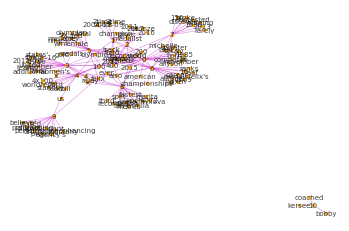

In [113]:
def plot_graph(G,font_size):
  pos = nx.spring_layout(G)
  labels={i:i for i in G.nodes}
  nx.draw_networkx_nodes(G, pos, node_size = 5, node_color='orange') 
  nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.5,edge_color='m')
  nx.draw_networkx_labels(G,pos,labels,alpha=0.75,font_size=font_size,font_color='k')
  plt.axis('off')
  plt.show()
  
plot_graph(B,7)

**Question 13:** Study projections in bipartite graphs. 

In [0]:
## a simple example
B = nx.Graph() ## graph!
B.add_nodes_from(['a','b','c','d','e','f'], bipartite=0) 
B.add_nodes_from(['g','h','i','j'], bipartite=1)
B.add_edges_from([('a','g'),('b','g'),('b','h'),('c','g'),('c','h'),('c','i'),('d','h'),('d','j'),('e','i'),('f','j')]) 

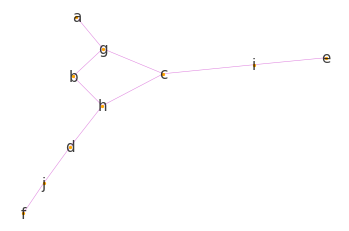

In [115]:
plot_graph(B,15)

In [0]:
bottom_nodes, top_nodes = bipartite.sets(B)

In [117]:
bottom_nodes

{'a', 'b', 'c', 'd', 'e', 'f'}

In [118]:
top_nodes

{'g', 'h', 'i', 'j'}

In [0]:
G = bipartite.projected_graph(B,bottom_nodes)

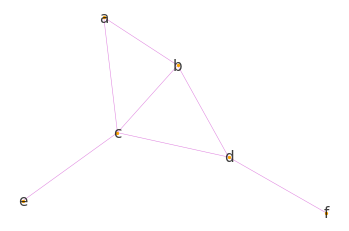

In [120]:
plot_graph(G,15)